In [44]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


df = pd.read_csv('/Users/ak/Downloads/archive/predictions.csv')

df.head()

,PredRedLesionMaxValue,image,label
0,0.956863,20060523_50003_0100_PP,3
1,0.996078,20060523_50019_0100_PP,3
2,0.996078,20060523_50135_0100_PP,2
3,0.721569,20060523_50153_0100_PP,0
4,0.996078,20060523_50234_0100_PP,3


In [45]:
df.image.unique()

array(['20060523_50003_0100_PP', '20060523_50019_0100_PP',
       '20060523_50135_0100_PP', ..., '20051214_57125_0100_PP',
       '20051214_57154_0100_PP', '20051214_57230_0100_PP'], dtype=object)

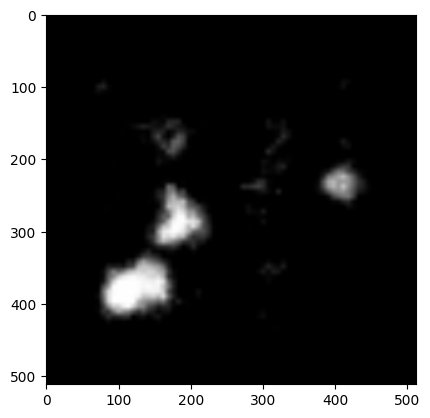

In [46]:
import os

# ... existing imports ...

image_path = '/Users/ak/Downloads/archive/localization/20051019_38557_0100_PP.png'
plt.imshow(cv2.imread(image_path))


In [47]:
image_name = '20060410_41767_0200_PP'
image_info = df[df['image'] == image_name]

print(image_info)


     PredRedLesionMaxValue                   image  label
364               0.768627  20060410_41767_0200_PP      1


In [48]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

# 1. Prepare the data
df = pd.read_csv('/Users/ak/Downloads/archive/predictions.csv')
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# 2. Load and preprocess images
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

# Assuming images are in the same directory as the CSV file
image_dir = '/Users/ak/Downloads/archive/localization/'
X = np.array([load_and_preprocess_image(os.path.join(image_dir, img_name + '.png')) for img_name in df['image']])
y = to_categorical(df['label_encoded'].values)

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# 5. Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# 6. Use the model for predictions
def predict_class(image_path):
    img = load_and_preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)[0]
    predicted_class = le.inverse_transform([np.argmax(prediction)])[0]
    return predicted_class, prediction

# Example usage
sample_image_path = '/Users/ak/Downloads/archive/localization/20051019_38557_0100_PP.png'
predicted_class, class_probabilities = predict_class(sample_image_path)
print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {class_probabilities}")

/Users/ak/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 512ms/step - accuracy: 0.4736 - loss: 1.2026 - val_accuracy: 0.6510 - val_loss: 0.8550
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.6583 - loss: 0.8987 - val_accuracy: 0.6823 - val_loss: 0.7836
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 446ms/step - accuracy: 0.7456 - loss: 0.7013 - val_accuracy: 0.6823 - val_loss: 0.8991
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 447ms/step - accuracy: 0.7587 - loss: 0.6803 - val_accuracy: 0.7031 - val_loss: 0.9331
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 455ms/step - accuracy: 0.7969 - loss: 0.5977 - val_accuracy: 0.6354 - val_loss: 1.1152
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 457ms/step - accuracy: 0.7685 - loss: 0.5713 - val_accuracy: 0.6927 - val_loss: 0.9815
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 482ms/step - accuracy: 0.8590 - loss: 0.4225 - val_accuracy: 0.6927 - val_loss: 1.3603
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 472ms/step - accuracy: 0.8963 - loss: 0.2778 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: 1
Class probabilities: [5.8775092e-03 9.8115611e-01 1.2904546e-02 6.1902567e-05]
     PredRedLesionMaxValue                   image  label  label_encoded
364               0.768627  20060410_41767_0200_PP      1              1


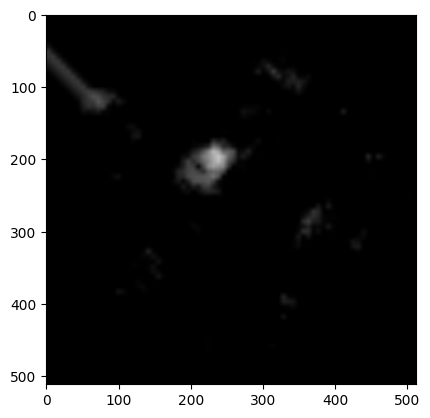

In [49]:
model.save("ak_model.h5")
from tensorflow.keras.models import load_model
loaded_model = load_model("ak_model.h5")

def predict_class(image_path, model):
    img = load_and_preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)[0]
    predicted_class = le.inverse_transform([np.argmax(prediction)])[0]
    return predicted_class, prediction

sample_image_path = '/Users/ak/Downloads/archive/localization/20060410_41767_0200_PP.png'
predicted_class, class_probabilities = predict_class(sample_image_path, loaded_model)
print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {class_probabilities}")

image_name = sample_image_path.split('/')[-1].split('.')[0]
image_info = df[df['image'] == image_name]

print(image_info)
image_path = sample_image_path
plt.imshow(cv2.imread(image_path))